In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

order = pd.read_csv('foodpanda.csv')
order.head()

,Unnamed: 0,Author Name,Review Date,Reviewer Ratings,Review Body,Developer Reply,Review Likes
0,1,Kilo K,2019年6月1日,1,點餐可以等兩個小時再給你一堆理由，或者給你乾等一個小時以上無故取消訂單，絕對讓你等到餓死的...,NaN,32
1,2,Skym0nsta,2019年6月3日,5,有貨到付款其實真的很不錯 下飛機累的要死 不想要去挖信用卡就廢在沙發上等他們到在去挖錢就好了,NaN,3
2,3,HAJIME LIU,2019年6月1日,5,非常爛的一間公司，外送員找不到地址還不耐煩，問他有沒有google map他也說不出來，還...,NaN,76
3,4,瞿卓文,2019年6月3日,4,對於好懶既我 除左連鎖餐廳外 呢個apps好有用 但有時呢個apps既缺點就係無啦啦轉哂英文,NaN,2
4,5,簡梘遊戲頻道,2019年6月2日,1,垃圾foodpanda 等咗廿分鐘 先同我講話要再訂過 間嘢太忙,NaN,5


In [44]:
yearCount = [0,0,0,0,0,0,0]
ratingCount = [0,0,0,0,0]
averageRating = 0
averageRatingOfYear = [0,0,0,0,0,0,0]
likesOfReviewsOfYear = [0,0,0,0,0,0,0]

import csv
with open('foodpanda.csv', newline='') as csvFile:

    rows = csv.DictReader(csvFile)
    for row in rows:
        i = int(row['Review Date'][3])
        yearCount[i - 3] += 1
        ratingCount[int(row['Reviewer Ratings']) - 1] += 1
        averageRating += int(row['Reviewer Ratings'])
        averageRatingOfYear[i - 3] += int(row['Reviewer Ratings'])
        likesOfReviewsOfYear[i - 3] += int(row['Review Likes'])
#         if(int(row['Review Likes']) > 50):
#             print(row['Review Body'] + ' (' + row['Review Likes'] + ')\n')
        
print(yearCount)
print(ratingCount)
averageRating /= sum(yearCount)
print(sum(yearCount))
print(averageRating)
for i in range (7):
    averageRatingOfYear[i] /= yearCount[i]
print(averageRatingOfYear)
print(likesOfReviewsOfYear)

[359, 409, 285, 533, 470, 1409, 3398]
[2817, 326, 343, 584, 2793]
6863
3.0305988634707854
[4.935933147632312, 3.6894865525672373, 2.905263157894737, 3.0581613508442778, 2.546808510638298, 2.1213626685592617, 3.200117716303708]
[17, 54, 131, 870, 1110, 3146, 6266]


In [82]:
averageRatingOfMonth = []
weightedRatingOfMonth = []
weightOfMonth = []
ratingCountOfMonth = []
for i in range(67):
    averageRatingOfMonth.append(0)
    weightedRatingOfMonth.append(0)
    weightOfMonth.append(0)
    ratingCountOfMonth.append(0)

import csv
with open('foodpanda.csv', newline='') as csvFile:

    rows = csv.DictReader(csvFile)
    for row in rows:
        month = 0
        if(row['Review Date'][6] == '1'):
            month = 11
        elif(row['Review Date'][6] == '2'):
            month = 12
        else:
            month = int(row['Review Date'][5])
        index = -12 + 12 * (int(row['Review Date'][3]) - 3) + month
        averageRatingOfMonth[index] += int(row['Reviewer Ratings'])
        weightedRatingOfMonth[index] += (int(row['Reviewer Ratings']) * (1 + int(row['Review Likes'])))
        weightOfMonth[index] += (1 + int(row['Review Likes']))
        ratingCountOfMonth[index] += 1
        
for i in range(67):
    if ratingCountOfMonth[i] != 0:
        averageRatingOfMonth[i] /= ratingCountOfMonth[i]
        weightedRatingOfMonth[i] /= weightOfMonth[i]

print(averageRatingOfMonth)

[4.935933147632312, 2.830188679245283, 4.0, 4.948717948717949, 4.868852459016393, 4.849462365591398, 3.4545454545454546, 2.9285714285714284, 2.2280701754385963, 2.269230769230769, 0, 2.3214285714285716, 3.0, 2.6875, 3.1923076923076925, 2.5416666666666665, 2.717948717948718, 3.21875, 3.227272727272727, 3.4814814814814814, 3.0, 1.6842105263157894, 0, 3.5454545454545454, 2.9411764705882355, 2.6986301369863015, 2.6818181818181817, 3.622950819672131, 2.942857142857143, 3.217391304347826, 3.0833333333333335, 3.25, 3.2962962962962963, 2.8043478260869565, 0, 2.676470588235294, 2.8333333333333335, 2.659340659340659, 3.5, 3.235294117647059, 3.1379310344827585, 2.914285714285714, 2.0, 2.4722222222222223, 2.3555555555555556, 1.9090909090909092, 0, 1.962962962962963, 1.7714285714285714, 2.1373626373626373, 1.6511627906976745, 1.9024390243902438, 2.1666666666666665, 2.125, 1.7526881720430108, 2.1914893617021276, 1.5437956204379562, 2.065989847715736, 0, 2.762237762237762, 2.651639344262295, 2.458333

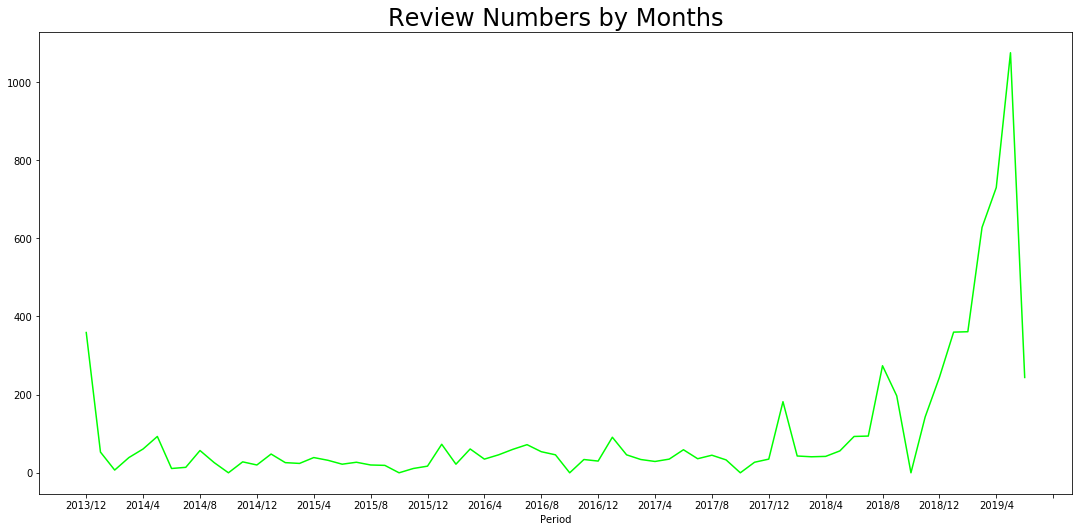

In [83]:
period = []
y = 2013
m = 12
for i in range(67):
    period.append(str(y) + '/' + str(m)) # + ' (' + str(ratingCountOfMonth[i]) + ' reviews)')
    m += 1
    if m > 12:
        m = 1
        y += 1
        
tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, ratingCountOfMonth, color = 'lime')
ax.set_title("Review Numbers by Months", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/foodpanda_review numbers.png')

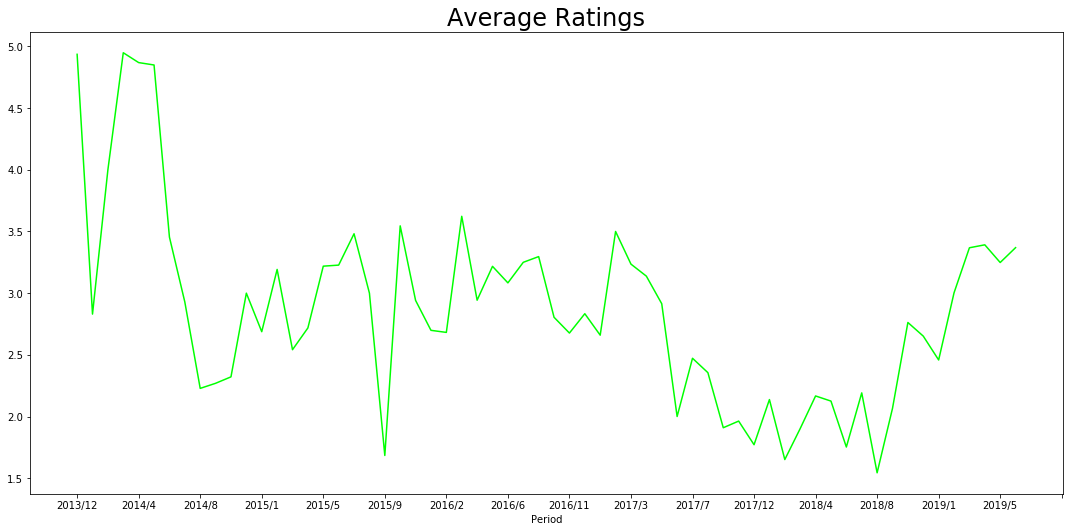

In [84]:
for i in range(67):
    if averageRatingOfMonth[i] == 0:
        averageRatingOfMonth.pop(i)
        weightedRatingOfMonth.pop(i)
        period.pop(i)
        
    if i == len(averageRatingOfMonth) - 1:
        break

tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, averageRatingOfMonth, color = 'lime')
ax.set_title("Average Ratings", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/foodpanda_average ratings.png')
plt.show()

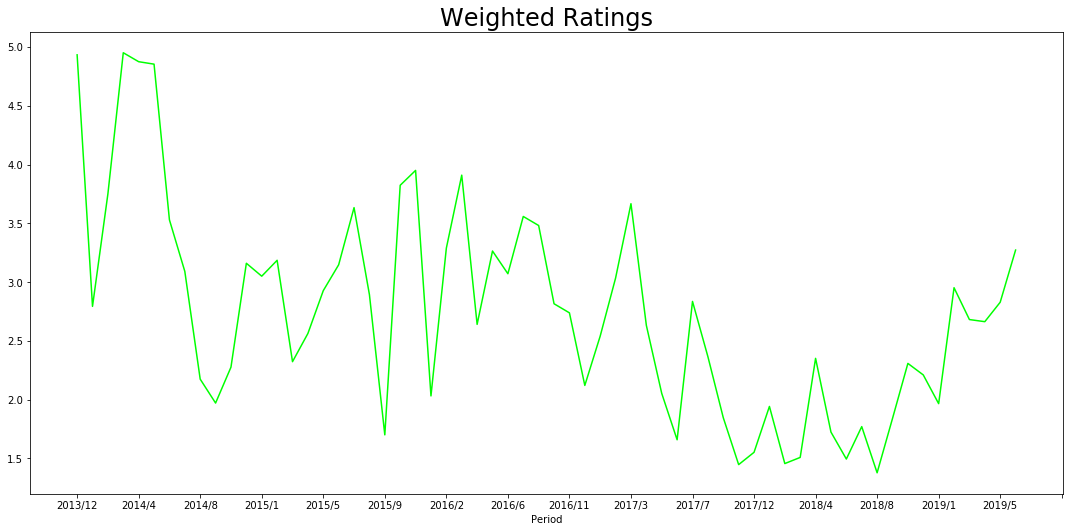

In [78]:
tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, weightedRatingOfMonth, color = 'lime')
ax.set_title("Weighted Ratings", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/foodpanda_weighted ratings.png')
plt.show()

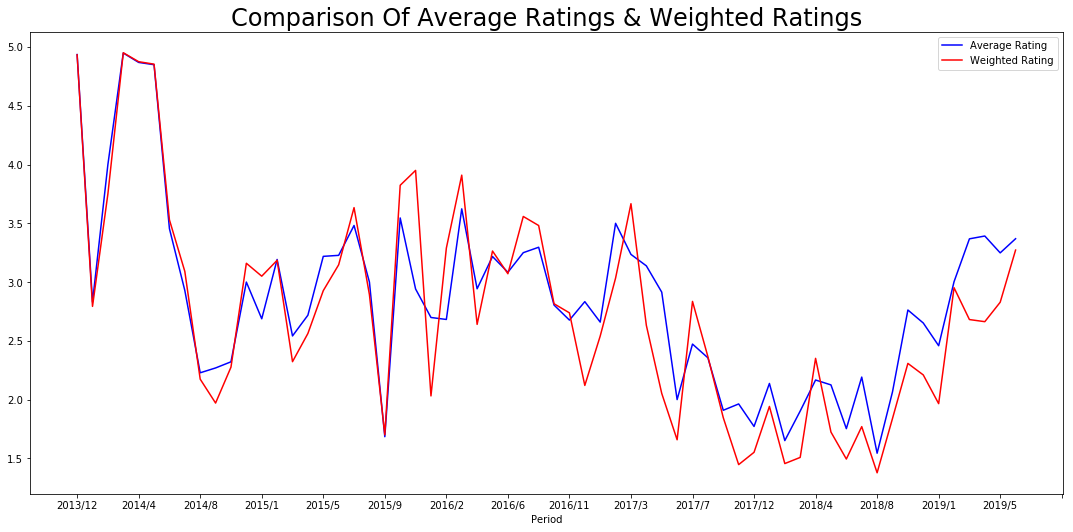

In [87]:
tick_spacing = 4
fig, ax = plt.subplots(1,1)
ax.plot(period, averageRatingOfMonth, color = 'blue', label = 'Average Rating')
ax.plot(period, weightedRatingOfMonth, color = 'red', label = 'Weighted Rating')
ax.set_title("Comparison Of Average Ratings & Weighted Ratings", fontsize = 24)
ax.set_xlabel("Period")
fig = plt.gcf()
fig.set_size_inches(18.5, 8.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.savefig('/Users/lin/Documents/foodpanda_comparison.png')
plt.legend()
plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/mp/xgl3pvfx3y36x2zp0svs3_sw0000gn/T/jieba.cache
Loading model cost 0.665 seconds.
Prefix dict has been built succesfully.


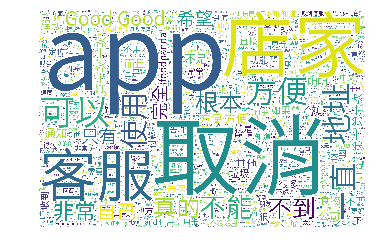

<Figure size 1000x600 with 0 Axes>

In [6]:
from wordcloud import WordCloud
from PIL import Image
import jieba

text_from_file_with_apath = open('foodpanda_txt.txt').read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
stopwords = {}.fromkeys([""])
wc = WordCloud(font_path="/Users/lin/Downloads/NotoSansCJKtc-hinted/NotoSansCJKtc-DemiLight.otf",
               background_color="white",
               max_words = 2000,
               stopwords=stopwords,
               width=3600, height=2400
              )

wc.generate(wl_space_split)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

wc.to_file("/Users/lin/Documents/foodpanda_wordcloud.jpg")

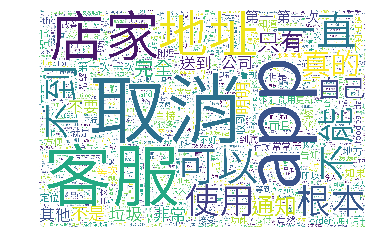

<Figure size 1000x600 with 0 Axes>

In [27]:
text_from_file_with_apath = open('foodpanda_txt_1-3.txt').read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
stopwords = {}.fromkeys([""])
wc = WordCloud(font_path="/Users/lin/Downloads/NotoSansCJKtc-hinted/NotoSansCJKtc-DemiLight.otf",
               background_color="white",
               max_words = 2000,
               stopwords=stopwords,
               width=3600, height=2400
              )

wc.generate(wl_space_split)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

wc.to_file("/Users/lin/Documents/foodpanda_wordcloud_1-3.jpg")

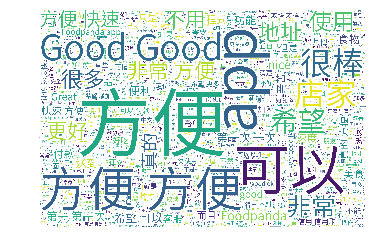

<Figure size 1000x600 with 0 Axes>

In [28]:
text_from_file_with_apath = open('foodpanda_txt_4-5.txt').read()
wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)
stopwords = {}.fromkeys([""])
wc = WordCloud(font_path="/Users/lin/Downloads/NotoSansCJKtc-hinted/NotoSansCJKtc-DemiLight.otf",
               background_color="white",
               max_words = 2000,
               stopwords=stopwords,
               width=3600, height=2400
              )

wc.generate(wl_space_split)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

wc.to_file("/Users/lin/Documents/foodpanda_wordcloud_4-5.jpg")